# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 


This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each column.
The data includes:
> - PatientId
> - AppointmentID
> - Gender of the patient
> - The day the patient scheduled the appointment
> - The Appointment Day the patient chose
> - Age of the patient
> - The Neighbourhood where the patient lives
> - Scholarship: whether the patient is on wellfare or not
> - Hipertension: whether the patient has Hypertension or not (increased blood pressure)
> - Diabetes: whether the patient has diabetes or not
> - Alcoholism: whether the patient suffers alcoholism or not
> - Handcap: whether the patient has a handicap
> - SMS_received: whether the patient received an SMS before his appointment
> - No-show: whether the patient showed up to their appointment


### Question(s) for Analysis


In our analysis of this data, we shall try to answer 4 main questions:
- 1- On what day do people show up the most?
- 2- Is there a relation between showing up and scholarship (wellfare)?
- 3- Does receiving an SMS help with showing up?
- 4- On average, how old were the patients that showed up?

These questions seek to assess the relationship between showing up -or not showing up- and several other factors such as time, SMS reminders and age for example.

In [79]:
# We import the packages we'll use.
# in this project we'll need the following packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [80]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

In this section of the report, we will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

In [81]:
# We Load the data and print out a few lines to examine the columns and some of the data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [82]:
df.shape

(110527, 14)

The data has 110,527 entries over 14 columns

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The data is surprisingly Free of null values.

The patientID is in float form which doesn't make sense, but this is of no concern since we won't be tackling this particular variable in this study. 

The Appointment Day are in string format. We will have to change that to Date_Time.

We will not be dealing with scheduled day.

In [84]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Since most of the data is binary in nature(Yes/No, 1/0) the descriptive statistics of the data of those columns don't concern us very much.

One area where we could gain some insight is the Age.

It appears we have an age of -1, which is a nonsensical entry that is most likely a mistake and is best removed.

Aside from that, it seems 50% of our patients fall below 37 years of age with an average of around 37 years as well suggesting the data isn't skewed in either directions.

In [85]:
df.loc[df["Age"] < 0].index

Int64Index([99832], dtype='int64')

We locate the erroneous entry. Number 99832

In [86]:
df.iloc[99832]

PatientId                  4.65943e+14
AppointmentID                  5775010
Gender                               F
ScheduledDay      2016-06-06T08:58:13Z
AppointmentDay    2016-06-06T00:00:00Z
Age                                 -1
Neighbourhood                    ROMÃO
Scholarship                          0
Hipertension                         0
Diabetes                             0
Alcoholism                           0
Handcap                              0
SMS_received                         0
No-show                             No
Name: 99832, dtype: object

In [87]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

It appears the patients have made repeated appointments seeing as 62,299 patients made 110,527 appointments.

It also appears that the Handicapped variable is not binary as first assumed.

https://www.kaggle.com/joniarroba/noshowappointments/discussion/30844#172847
This post made by the dataset creator does indeed state that any values beyond 0 and 1 are erroneous.

In [88]:
df['Handcap'].unique()

array([0, 1, 2, 3, 4])

In [89]:
df.query('Handcap > 1').count()

PatientId         199
AppointmentID     199
Gender            199
ScheduledDay      199
AppointmentDay    199
Age               199
Neighbourhood     199
Scholarship       199
Hipertension      199
Diabetes          199
Alcoholism        199
Handcap           199
SMS_received      199
No-show           199
dtype: int64

We have 199 erroneous entries. I have chosen to drop those entries

In [90]:
df.drop(df[df.Handcap > 1].index, inplace=True)

In [91]:
df['Handcap'].unique()

array([0, 1])

The Handicapness variable is now a binary one where 0 means non-handicapped and 1 means handicapped

In [92]:
sum(df.duplicated())

0

We have No duplicated rows.


### Data Cleaning
 

In [93]:
df.drop(['PatientId','AppointmentID','ScheduledDay','Neighbourhood'],axis=1,inplace=True)
df.head()

,Gender,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T00:00:00Z,62,0,1,0,0,0,0,No
1,M,2016-04-29T00:00:00Z,56,0,0,0,0,0,0,No
2,F,2016-04-29T00:00:00Z,62,0,0,0,0,0,0,No
3,F,2016-04-29T00:00:00Z,8,0,0,0,0,0,0,No
4,F,2016-04-29T00:00:00Z,56,0,1,1,0,0,0,No


We start by dropping the unnecessary columns from our data.

While they could be valuable to answer other questions, for the purposes of our questions, we won't be needing certain data, such as:

 - Patient ID
 - Appointment ID
 - Scheduled Day
 - Neighbourhood

In [94]:
df.drop(df.loc[df["Age"] < 0].index,inplace=True)

We also remove the erroneous age -1 from our dataset.

In [95]:
df.shape

(110327, 10)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110327 entries, 0 to 110526
Data columns (total 10 columns):
Gender            110327 non-null object
AppointmentDay    110327 non-null object
Age               110327 non-null int64
Scholarship       110327 non-null int64
Hipertension      110327 non-null int64
Diabetes          110327 non-null int64
Alcoholism        110327 non-null int64
Handcap           110327 non-null int64
SMS_received      110327 non-null int64
No-show           110327 non-null object
dtypes: int64(7), object(3)
memory usage: 9.3+ MB


In [97]:
df["AppointmentDay"] = pd.to_datetime(df["AppointmentDay"])

We change the appointment day to an appropriate format, datetime.

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110327 entries, 0 to 110526
Data columns (total 10 columns):
Gender            110327 non-null object
AppointmentDay    110327 non-null datetime64[ns]
Age               110327 non-null int64
Scholarship       110327 non-null int64
Hipertension      110327 non-null int64
Diabetes          110327 non-null int64
Alcoholism        110327 non-null int64
Handcap           110327 non-null int64
SMS_received      110327 non-null int64
No-show           110327 non-null object
dtypes: datetime64[ns](1), int64(7), object(2)
memory usage: 9.3+ MB


In [99]:
df.rename({"Scholarship": "Wellfare", "Hipertension":"Hypertension","Handcap":"Handicapped","No-show":"NoShow"},axis=1,inplace=True)
df.head()

,Gender,AppointmentDay,Age,Wellfare,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_received,NoShow
0,F,2016-04-29,62,0,1,0,0,0,0,No
1,M,2016-04-29,56,0,0,0,0,0,0,No
2,F,2016-04-29,62,0,0,0,0,0,0,No
3,F,2016-04-29,8,0,0,0,0,0,0,No
4,F,2016-04-29,56,0,1,1,0,0,0,No


For the sake of clarity, we edit some of the column names into more readable ones.

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 "On what day do people show up the most?"

In [100]:
df['Day'] = df['AppointmentDay'].dt.day_name()
df.head()

,Gender,AppointmentDay,Age,Wellfare,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_received,NoShow,Day
0,F,2016-04-29,62,0,1,0,0,0,0,No,Friday
1,M,2016-04-29,56,0,0,0,0,0,0,No,Friday
2,F,2016-04-29,62,0,0,0,0,0,0,No,Friday
3,F,2016-04-29,8,0,0,0,0,0,0,No,Friday
4,F,2016-04-29,56,0,1,1,0,0,0,No,Friday


We start by extracting the days (by name) from our AppointmentDay column and adding them to a separate column, Day

In [101]:
df_show = df.query('NoShow == "No"')
df_show.shape

(88049, 11)

We have 88,207 appointments who did show up.

In [102]:
def bar_plt(df_unknown,column,color,title):
    df_unknown[column].value_counts(normalize=True).plot.bar(figsize=(7,7),color=color,title=title);

I will be using many charts here with certain parameters repeatedly, so I opted to put all those set parameters within a function for ease of use.

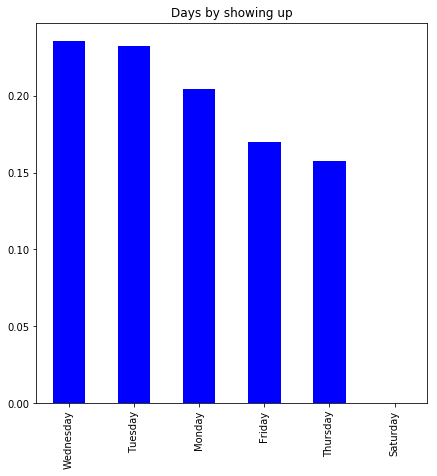

In [103]:
bar_plt(df_show,'Day','blue','Days by showing up')

#### It appears that **Wednesday** is the most day where people show up to their appointments followed closely by Tuesday.

### Research Question 2 "Is there a relation between showing up and scholarship (wellfare)?"

In [108]:
df_sch = df.query('Wellfare == "1"')
df_no_sch = df.query('Wellfare == "0"')

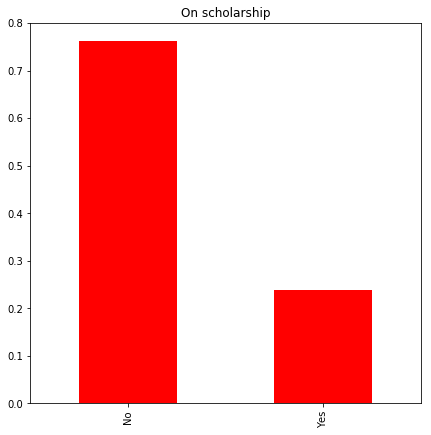

In [109]:
bar_plt(df_sch,'NoShow','red','On scholarship')

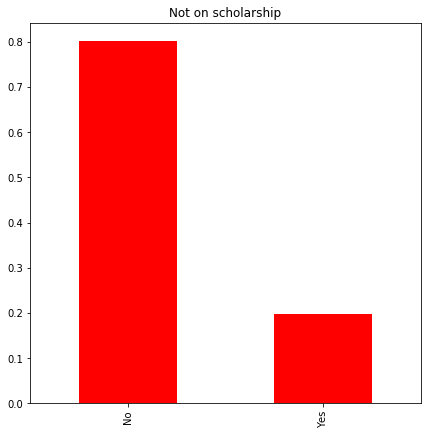

In [110]:
bar_plt(df_no_sch,'NoShow','red','Not on scholarship')

#### It appears that being on wellfare does not impact showing up to appointments.

### Research Question 3 "Does receiving an SMS help with showing up?"

In [111]:
df_no_sms = df.query('SMS_received == "0"')
df_sms = df.query('SMS_received == "1"')

In [112]:
df_no_sms.count()

Gender            74892
AppointmentDay    74892
Age               74892
Wellfare          74892
Hypertension      74892
Diabetes          74892
Alcoholism        74892
Handicapped       74892
SMS_received      74892
NoShow            74892
Day               74892
dtype: int64

In [113]:
df_sms.count()

Gender            35435
AppointmentDay    35435
Age               35435
Wellfare          35435
Hypertension      35435
Diabetes          35435
Alcoholism        35435
Handicapped       35435
SMS_received      35435
NoShow            35435
Day               35435
dtype: int64

Of our patients, 74,892 did NOT receive SMS for their appointments, while 35,435 did.

In [114]:
def pie_plt(df_unknown,title):
    df_unknown["NoShow"].value_counts().plot.pie(figsize=(7,7),title=title,autopct='%1.1f%%');

We make another function for pie charts as we did with bar charts.

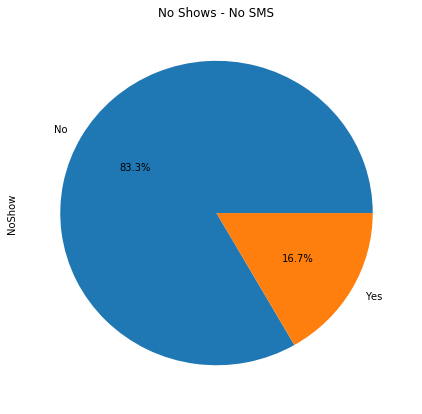

In [115]:
pie_plt(df_no_sms,'No Shows - No SMS')

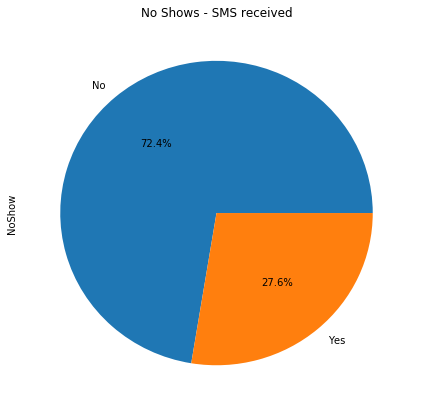

In [116]:
pie_plt(df_sms,'No Shows - SMS received')

#### It does not appear that receiving an SMS helps significantly with people showing up to their appointments.

### Research Question 4 "On average, how old were the patients that showed up?"

In [117]:
df_didnt_show = df.query('NoShow == "Yes"')

In [118]:
mean_ages = df.groupby('NoShow')['Age'].mean()
mean_ages

NoShow
No     37.777090
Yes    34.279109
Name: Age, dtype: float64

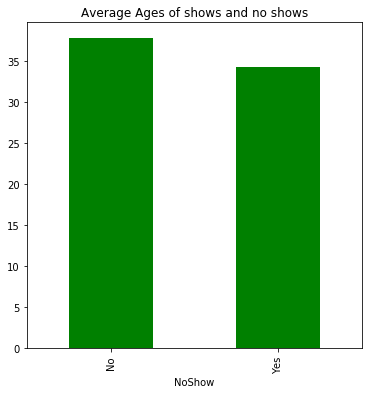

In [119]:
mean_ages.plot.bar(figsize=(6,6),color='green',title='Average Ages of shows and no shows');

#### On average, people who did show up to their appointments were around 37.79 years old.

<a id='conclusions'></a>
## Conclusions

1- On what day do people show up the most?
 - #### It appears that Wednesday is the most day where people show up to their appointments followed closely by Tuesday.

2- Is there a relation between showing up and scholarship (wellfare)?
 - #### It appears that being on wellfare does not impact showing up to appointments.

3- Does receiving an SMS help with showing up?

 - #### It does not appear that receiving an SMS helps significantly with people showing up to their appointments.

4- On average, how old were the patients that showed up?
 - #### On average, people who did show up to their appointments were around 37.79 years old.


### Limitations

I would've liked to investigate the effect of the distance between the neighbourhood where the hospital is and the place where the patient lives on the No-Show variable but unfortunately there wasn't any data on the living addresses of the patients, possibly for anonymity 
